We want to replicate the author's data from the lcfit package to make sure the implementation of lcfit on the new data is correct. we start off with implementing the tests provided in the package to see how the model works:


## The first test:


There are two inputs for this test :
 1. a list.  [id]  [period]
 2. a photometric time series directory.   [time]  [value]  [value_error]





 

##### The list input:

the first test has a list file test1.lst which consist of 3 RRL stars from the OGLE-IV survey. This list shows the id and period of these stars.
This list acts like a sort of metadata.

##### The photometric time series directory:
this directory includes 3 .dat files corresponding to each star. inside this files we have a times series, their values, and the value errors.sometimes for each time we have many values and their errors which shows that the suvery has been conducted with different photometric aperture sizes.

In [5]:
import pandas as pd
import io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


In [14]:
file_path = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test1.lst'

data = []
with open(file_path, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

test1_lst = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ')
test1_lst.drop(columns= 'Unnamed: 1', inplace= True)
test1_lst

,id,period
0,b56841,0.580855
1,b57131,0.537362
2,b21314,0.562962


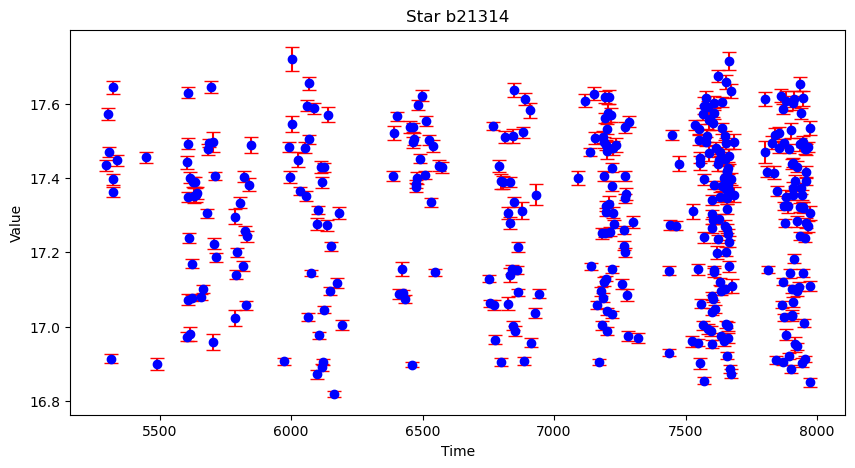

In [31]:
file_path_14 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b21314.dat'

data = []
with open(file_path_14, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b21314 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b21314.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b21314

plt.errorbar(b21314.Time, b21314.Value, yerr=b21314.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b21314')

# Display the plot
plt.show()



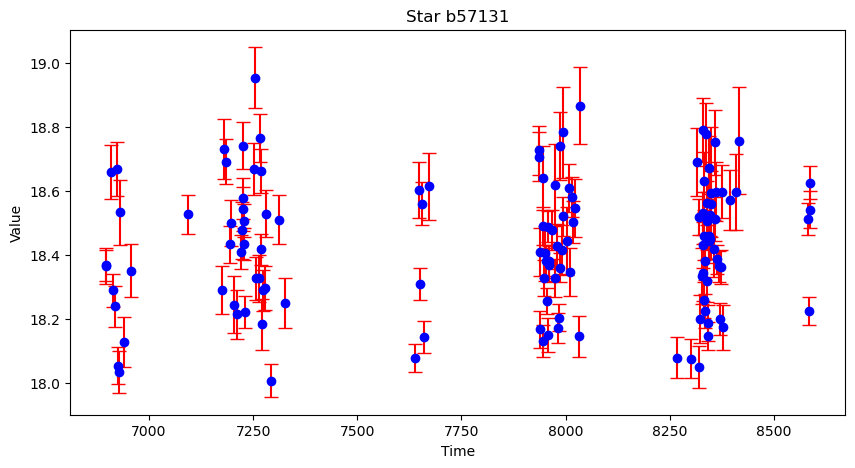

In [32]:
file_path_31 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b57131.dat'

data = []
with open(file_path_31, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b57131 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b57131.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b57131

plt.errorbar(b57131.Time, b57131.Value, yerr=b57131.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b57131')

# Display the plot
plt.show()


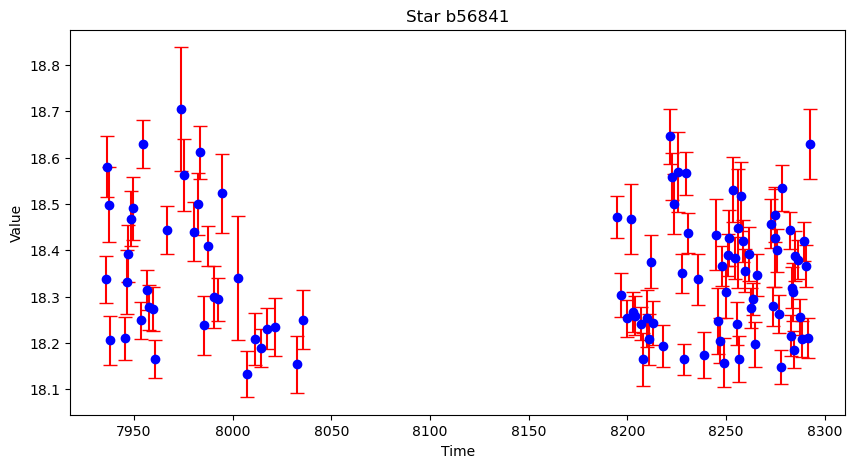

In [34]:
file_path_41 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b56841.dat'

data = []
with open(file_path_41, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b56841 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b56841.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b56841

plt.errorbar(b56841.Time, b56841.Value, yerr=b56841.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b56841')

# Display the plot
plt.show()

Now we want to process these light curves and make them phase-folded with lcfit package. We have to change the lcfit parameter file like this :

parameter file `lcfit.par`:

`--input_list test1.lst --input_dir test_photometry --n_data_cols 1 
--use_data_cols 1 --is_err_col`


In [3]:
!python lcfit.py @lcfit.par

===================> OBJECT 1 : b56841<===================
object 1 (b56841)
./test_photometry/b56841.dat found.

----------
Dataset 1
----------
n_LC = 99
P_in = 0.58085535
---------- Direct Fourier fit ----------

Iteration 1
order = 4  --->  score = 0.06844670
order = 5  --->  score = 0.06850223
order = 6  --->  score = 0.06878497

optimal order = 4  (mean CV score = 0.068)
number of outliers: 1
Iteration 2
order = 4  --->  score = 0.06115630
order = 5  --->  score = 0.06222971
order = 6  --->  score = 0.06343021

optimal order = 4  (mean CV score = 0.061)
number of outliers: 0

object: b56841  ,   N=98 (99)  ,  ap. 1:  N_F=4  ,  P=0.580853  ,  dP=-0.000002  ,  sig=0.057  ,  cost=0.1198  ,  <mag>=18.360  ,  SNR=78.44
RESULTS:
object: b56841  ,   N=98 (99)  ,  ap. 1:  N_F=4  ,  P=0.580853  ,  dP=-0.000002  ,  sig=0.057  ,  cost=0.1198  ,  <mag>=18.360,  SNR=78.44
Intercept: 18.35965689229766
Amplitudes: [0.15093991 0.06972572 0.06090317 0.02349017]
phi21 = 9.376549522205838
phi31 = 6

## Outputs for test 1:

we have  outputs:

--output_param_file: The derived regression parameters and descriptive statistics are written to a file `test.dat`.

--output_data_dir: The outlier-free, phase-folded time series corresponding to the best dataset 
per input file is written to a subdirecory specified by  `phasedlc_test`.

--output_syn_dir: Synthetic time series (i.e., the best-fitting regression model evaluated over an equidistant phase grid) are written to the subdirectory specified by `synlc_test`.

--output_gpr_dir: the GPR models will be saved using `joblib` and written to files the provided directory `gpr_test`.

--plot_dir: Figures showing the phase-folded time series, the rejected outliers, and the 
best-fitting regression models are generated for each input time series and
written to a subdirectory specified by `lcplots_test`



Let's see the outputs:


In [17]:
file_path_test_out = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test.dat'

data = []
with open(file_path_test_out, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        
            

        data.append(out_line)

test_out = pd.read_csv(io.StringIO(''.join(data)), delim_whitespace=True)

test_out

,id,Nep,period,totamp,A1,A2,A3,A1_e,A2_e,A3_e,...,meanmag_e,cost,aper,phcov,phcov2,snr,ZPErr,Npt,order,minmax
0,b56841,98,0.580853,0.447,0.153,0.066,0.064,0.011,0.010,0.009,...,0.007,0.1198,1,0.952,0.956,78.4,0.0,98,4,0.571
1,b57131,125,0.537361,0.617,0.213,0.104,0.066,0.015,0.013,0.016,...,0.011,0.3521,1,0.962,0.962,70.2,0.0,125,4,0.948
2,b21314,353,0.562962,0.768,0.239,0.133,0.087,0.003,0.003,0.003,...,0.002,0.1642,1,0.983,0.984,489.5,0.0,353,6,0.901


In [18]:
test_out.columns # these are in I-band 


Index(['id', 'Nep', 'period', 'totamp', 'A1', 'A2', 'A3', 'A1_e', 'A2_e',
       'A3_e', 'phi1', 'phi2', 'phi3', 'phi1_e', 'phi2_e', 'phi3_e', 'phi21',
       'phi21_e', 'phi31', 'phi31_e', 'meanmag', 'meanmag_e', 'cost', 'aper',
       'phcov', 'phcov2', 'snr', 'ZPErr', 'Npt', 'order', 'minmax'],
      dtype='object')

Text(0, 0.5, 'mag')

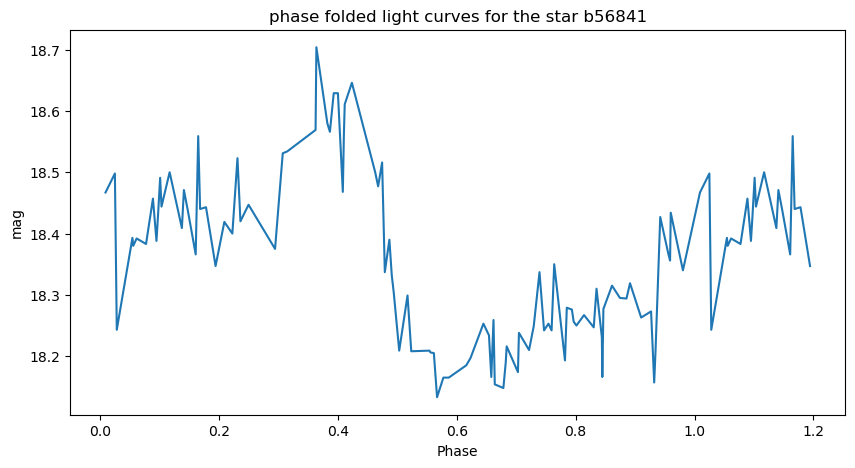

In [23]:
file_path_phased = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/phasedlc_test/b56841.dat'

data = []
with open(file_path_phased, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        
            

        data.append(out_line)

ph = pd.read_csv(io.StringIO(''.join(data)), delim_whitespace=True, header= None)
ph.columns = {'Phase': '0', 'Value': '1'}
ph


plt.plot(ph.Phase, ph.Value)
plt.title('phase folded light curves for the star b56841')
plt.xlabel('Phase')
plt.ylabel('mag')

# Replication of Dekany's data for deep learning:

### The list input:

In [38]:
DR3 = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani.csv')


columns_to_extract = ['source_id', 'pf']
extracted_data = DR3[columns_to_extract]
extracted_data



,source_id,pf
0,6380659528686603008,0.550068
1,5412243359495900928,0.573513
2,4055098870077726976,0.427283
3,6735230515154698880,0.367562
4,2973954279102006656,0.656178
...,...,...
90,4473628559603349888,0.380685
91,3839232130153219456,0.547791
92,6897755139944897024,0.797464
93,6836508627130440064,0.800068


In [50]:
extracted_data.source_id.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany replication/id.txt', index = False, header= False)

In [39]:


output_file_path = '/Users/melikakeshavarz/Desktop/Thesis/Dekany replication/DR3.lst'


with open(output_file_path, 'w') as f:
    f.write('# id  period'+ '\n')
    extracted_data.to_string(f, index=False, header=False, float_format='%.8f')




### The times series input:

In [51]:
# this data frame is for star with the id 630421935431871232

df_time = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/LC/630421935431871232.csv', index_col= None)
df_time.drop(columns='Unnamed: 0', inplace= True)
df_t = df_time[['time', 'mag']]

out = '/Users/melikakeshavarz/Desktop/Thesis/Dekany replication/star.dat'

with open(out, 'w') as f:
    df_t.to_string(f, index = False , header = False)





## The difference between our data and Dekany's:

1. they have error for the mag in the time series (commented the flag)
2. they have zperr_col column in the time series (commented the flag)


In [3]:
# only for a single star:
!python lcfit.py @lcfit.par

===================> OBJECT 1 : 630421935431871232<===================
object 1 (630421935431871232)
./DR3_time_series_g/630421935431871232.dat found.

----------
Dataset 1
----------
n_LC = 29
P_in = 0.45240543
---------- Direct Fourier fit ----------

Iteration 1
order = 4  --->  score = 0.06303267
order = 5  --->  score = 0.03797045
order = 6  --->  score = 0.04497228

optimal order = 5  (mean CV score = 0.038)
number of outliers: 0

object: 630421935431871232  ,   N=29 (29)  ,  ap. 1:  N_F=5  ,  P=0.452408  ,  dP=0.000002  ,  sig=0.012  ,  cost=0.0021  ,  <mag>=10.695  ,  SNR=474.81
RESULTS:
object: 630421935431871232  ,   N=29 (29)  ,  ap. 1:  N_F=5  ,  P=0.452408  ,  dP=0.000002  ,  sig=0.012  ,  cost=0.0021  ,  <mag>=10.695,  SNR=474.81
Intercept: 10.69506648418483
Amplitudes: [0.40393642 0.17809624 0.12232101 0.06642805 0.03317869]
phi21 = 8.544662219918395
phi31 = 4.815007402150592
Performing GPR fit...
initial noise level = 0.00015
final kernel:
5.82**2 * ExpSineSquared(lengt